In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the HR data 

hrdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\HR_comma_sep.csv", header=0)

# Copy to back-up file

hrdata_bk = hrdata.copy()

# Display first 5 records

hrdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Display the dataset information

hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Display dataset columns

hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
# Create cols1 for crating a dummy variables & Cols 2 for scaling the data normilization

cols1 = ['Department', 'salary']
cols2 = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

In [6]:
# Create dummy variable for all cols1 columns

hrdata = pd.get_dummies(hrdata, columns=cols1)
hrdata.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.80,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2.00,5.00,7.00,5.00,2.00
average_montly_hours,157.00,262.00,272.00,223.00,159.00
time_spend_company,3.00,6.00,4.00,5.00,3.00
Work_accident,0.00,0.00,0.00,0.00,0.00
left,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,0.00,0.00,0.00,0.00,0.00
Department_IT,0.00,0.00,0.00,0.00,0.00
Department_RandD,0.00,0.00,0.00,0.00,0.00


In [7]:
# Identify the independent and Target variables

IndepVar = []
for col in hrdata.columns:
    if col != 'left':
        IndepVar.append(col)

TargetVar = 'left'

x = hrdata[IndepVar]
y = hrdata[TargetVar]

In [8]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((10499, 20), (4500, 20), (10499,), (4500,))

In [9]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

# LightGBM Classification Algorithms

Confusion matrix : 
 [[1022   49]
 [  16 3413]]
Outcome values : 
 1022 49 16 3413
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      1071
           0       0.99      1.00      0.99      3429

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy : 98.6 %
Precision : 98.5 %
Recall : 95.4 %
F1 Score : 0.969
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 97.4 %
MCC : 0.96
roc_auc_score: 0.975


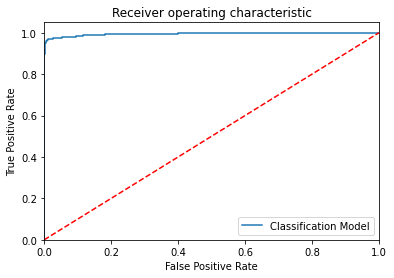

-----------------------------------------------------------------------------------------------------


In [11]:
# Training the lightgbm model on the Training set

import lightgbm as lgb

# Build the model

modelLGB = lgb.LGBMClassifier()

# Fit the model with train data

modelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelLGB.predict(x_test)
y_pred_prob = modelLGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelLGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [14]:
# Load the result dataset

CSResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 391  680]
 [ 255 3174]]
Outcome values : 
 391 680 255 3174
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.37      0.46      1071
           0       0.82      0.93      0.87      3429

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500

Accuracy : 79.2 %
Precision : 60.5 %
Recall : 36.5 %
F1 Score : 0.455
Specificity or True Negative Rate : 92.6 %
Balanced Accuracy : 64.6 %
MCC : 0.353
roc_auc_score: 0.645


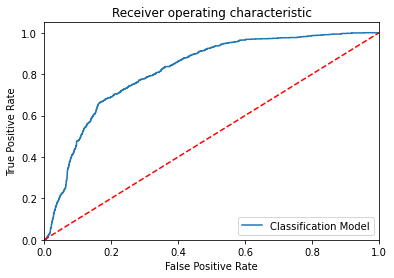

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1039   32]
 [  78 3351]]
Outcome values : 
 1039 32 78 3351
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.97      0.95      1071
           0       0.99      0.98      0.98      3429

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Accuracy : 97.6 %
Precision : 93.0 %
Recall : 97.0 %
F1 Score : 0.95
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 97.4 %
MCC : 0.934
roc_auc_score: 0.974


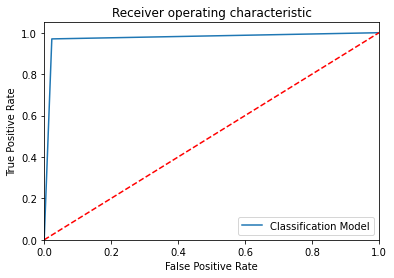

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1031   40]
 [   7 3422]]
Outcome values : 
 1031 40 7 3422
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98      1071
           0       0.99      1.00      0.99      3429

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy : 99.0 %
Precision : 99.3 %
Recall : 96.3 %
F1 Score : 0.978
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 98.0 %
MCC : 0.971
roc_auc_score: 0.98


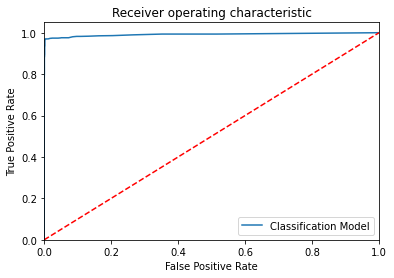

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1024   47]
 [  16 3413]]
Outcome values : 
 1024 47 16 3413
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97      1071
           0       0.99      1.00      0.99      3429

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy : 98.6 %
Precision : 98.5 %
Recall : 95.6 %
F1 Score : 0.97
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 97.6 %
MCC : 0.961
roc_auc_score: 0.976


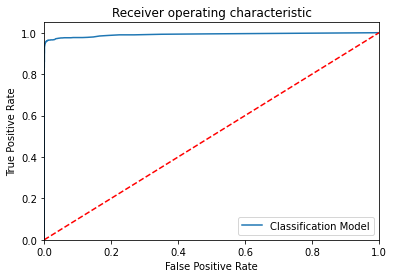

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 949  122]
 [ 144 3285]]
Outcome values : 
 949 122 144 3285
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.89      0.88      1071
           0       0.96      0.96      0.96      3429

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500

Accuracy : 94.1 %
Precision : 86.8 %
Recall : 88.6 %
F1 Score : 0.877
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 92.2 %
MCC : 0.838
roc_auc_score: 0.922


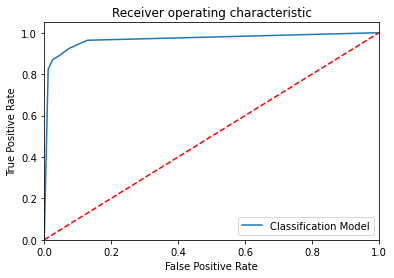

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 869  202]
 [1259 2170]]
Outcome values : 
 869 202 1259 2170
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.81      0.54      1071
           0       0.91      0.63      0.75      3429

    accuracy                           0.68      4500
   macro avg       0.66      0.72      0.65      4500
weighted avg       0.79      0.68      0.70      4500

Accuracy : 67.5 %
Precision : 40.8 %
Recall : 81.1 %
F1 Score : 0.543
Specificity or True Negative Rate : 63.3 %
Balanced Accuracy : 72.2 %
MCC : 0.379
roc_auc_score: 0.722


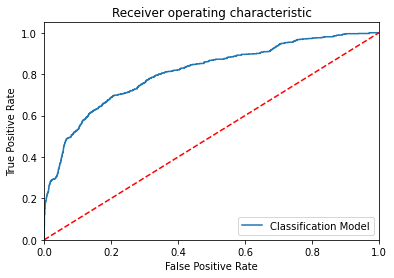

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 921  150]
 [ 129 3300]]
Outcome values : 
 921 150 129 3300
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.86      0.87      1071
           0       0.96      0.96      0.96      3429

    accuracy                           0.94      4500
   macro avg       0.92      0.91      0.91      4500
weighted avg       0.94      0.94      0.94      4500

Accuracy : 93.8 %
Precision : 87.7 %
Recall : 86.0 %
F1 Score : 0.868
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 91.1 %
MCC : 0.828
roc_auc_score: 0.911


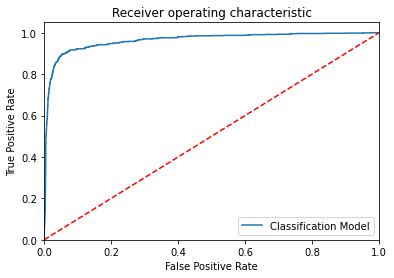

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[1006   65]
 [  38 3391]]
Outcome values : 
 1006 65 38 3391
Classification report : 
               precision    recall  f1-score   support

  

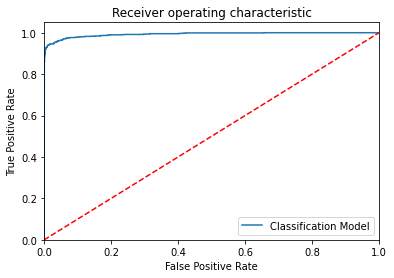

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1022   49]
 [  16 3413]]
Outcome values : 
 1022 49 16 3413
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.95      0.97      1071
           0       0.99      1.00      0.99      3429

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy : 98.6 %
Precision : 98.5 %
Recall : 95.4 %
F1 Score : 0.969
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 97.4 %
MCC : 0.96
roc_auc_score: 0.975


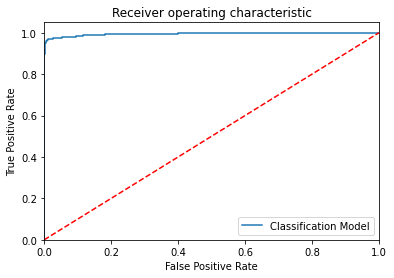

-----------------------------------------------------------------------------------------------------


In [15]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')

modelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [56]:
# Results with comparing the all the algorithms 

#CSResults.to_csv("D://00 DataScience//01-Internship//CSResults_22.csv")

CSResults.head(20)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.792,0.605,0.365,0.455,0.926,0.353,0.645357,0.646
1,DecisionTreeClassifier(),0.972,0.918,0.968,0.942,0.973,0.924,0.970566,0.970
2,"(DecisionTreeClassifier(max_features='auto', r...",0.989,0.991,0.961,0.976,0.997,0.969,0.979080,0.979
3,"(ExtraTreeClassifier(random_state=172770975), ...",0.986,0.985,0.955,0.970,0.995,0.961,0.975258,0.975
4,KNeighborsClassifier(),0.941,0.868,0.886,0.877,0.958,0.838,0.922047,0.922
5,GaussianNB(),0.675,0.408,0.811,0.543,0.633,0.379,0.722114,0.722
6,SVC(probability=True),0.938,0.877,0.860,0.868,0.962,0.828,0.911162,0.911
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.977,0.964,0.939,0.951,0.989,0.936,0.964114,0.964
8,LGBMClassifier(),0.986,0.985,0.954,0.969,0.995,0.960,0.974791,0.974
